# Sistemes Distribuïts
## Curs 2020-2021
### Víctor Cano i Guillem Gorgori

In [6]:
import lithops
from lithops import Storage
from matplotlib import pyplot as plt
import math
import pandas as pd
from io import StringIO
import numpy as np
from numpy.polynomial.polynomial import polyfit
storage = Storage()

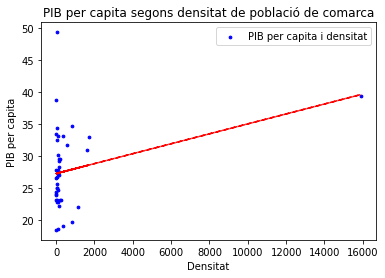

In [9]:

csv = storage.get_object('2021sdvictor', 'densitatPerPIB.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#df = df.loc[df['COMARCA'] != 'BARCELONES']
#showing data
x = df['DENSITAT']
y = df['PIB_CAPITA']
b, m = polyfit(x, y, 1)
plt.scatter(x,y,label="PIB per capita i densitat", color="blue", marker=".", s=30)
plt.xlabel('Densitat')
plt.ylabel('PIB per capita')
plt.title('PIB per capita segons densitat de població de comarca')
plt.legend()
plt.plot(x,b + m * x,"r--")
plt.show()

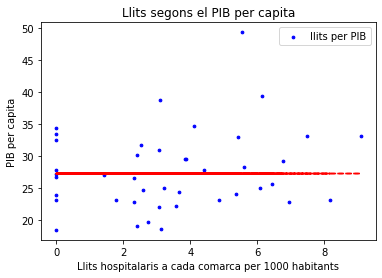

In [10]:
csv = storage.get_object('2021sdvictor', 'llitsPerPIB.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
x = df['LLITS_1000_HAB']
y = df['PIB_CAPITA']
p= polyfit(x, y, 1)
plt.scatter(x,y,label="llits per PIB", color="blue", marker=".", s=30)
plt.xlabel('Llits hospitalaris a cada comarca per 1000 habitants')
plt.ylabel('PIB per capita')
plt.title('Llits segons el PIB per capita')
plt.legend()
plt.plot(x,b + m * x,"r--")
plt.show()

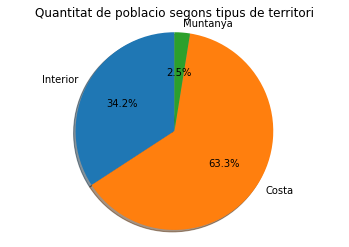

In [76]:
csv = storage.get_object('2021sdvictor', 'habitantsPerTipusComarca.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
muntanya = 0
platja = 0
interior = 0
i = 0
total = 0
for h in df['HABITANTS']:
    if df['TIPUS_COMARCA'][i] == 'Interior':
        interior = interior + h
    if df['TIPUS_COMARCA'][i] == 'Costa':
        platja = platja + h
    if df['TIPUS_COMARCA'][i] == 'Muntanya':
        muntanya = muntanya + h
    total = total + h
    i=i+1
labels = 'Interior', 'Costa', 'Muntanya'
sizes = [(interior/total)*100,(platja/total)*100,(muntanya/total)*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Quantitat de poblacio segons tipus de territori')
plt.show()

No handles with labels found to put in legend.


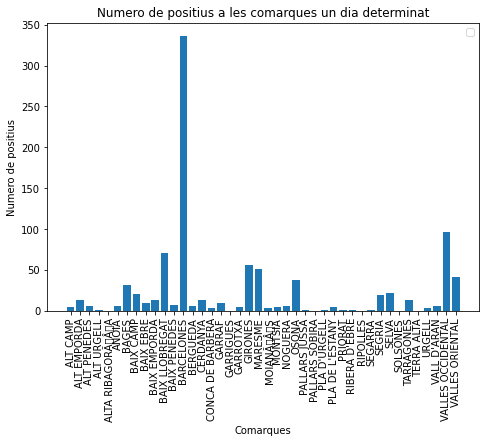

In [12]:
csv = storage.get_object('2021sdvictor', 'positiusEntre15i64Anysv2.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',') 
#showing data
data = "18/09/2020"
result = df.loc[df['DATA'] == data]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result['COMARCA'],result['POSITIUS'])
plt.xticks(rotation=90)
plt.xlabel('Comarques')
plt.ylabel('Numero de positius')
plt.title('Numero de positius a les comarques un dia determinat')
plt.legend()
plt.show()

<ipython-input-13-02147e4bb7eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['DATA'] = pd.to_datetime(result['DATA'])
No handles with labels found to put in legend.


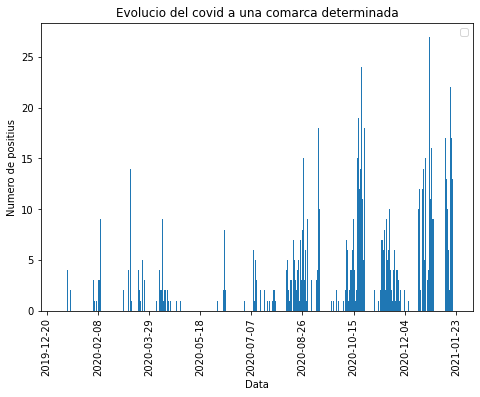

In [13]:
csv = storage.get_object('2021sdvictor', 'positiusEntre15i64Anysv2.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
comarca = "ALT CAMP"
result = df.loc[df['COMARCA'] == comarca]
result['DATA'] = pd.to_datetime(result['DATA'])
result = result.sort_values(by='DATA')
result = result.head(315)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result['DATA'],result['POSITIUS'])
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Data')
plt.ylabel('Numero de positius')
plt.title('Evolucio del covid a una comarca determinada')
plt.legend()
plt.show()

No handles with labels found to put in legend.


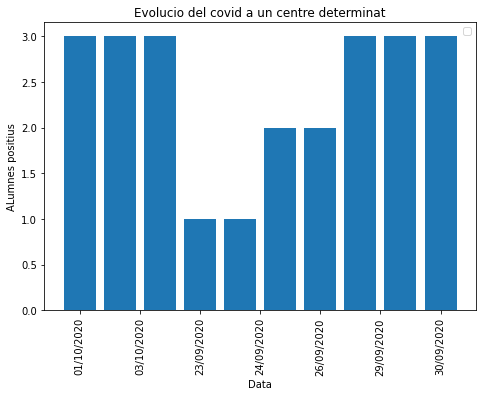

In [14]:
csv = storage.get_object('2021sdvictor', 'evolucioCovidEducatiuPositius.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',') 
codi_centre = 8000271 
result = df.loc[df['CODI_CENTRE'] == codi_centre]
result = result.sort_values(by='DATA')
#result = result.head(315)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result['DATA'],result['ALUMNES_POSITIUS_ACUM'])
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Data')
plt.ylabel('ALumnes positius')
plt.title('Evolucio del covid a un centre determinat')
plt.legend()
plt.show()

No handles with labels found to put in legend.


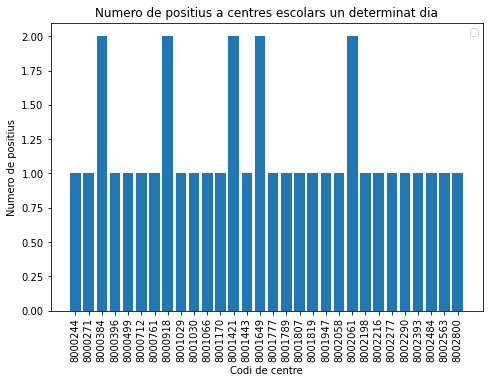

In [17]:
csv = storage.get_object('2021sdvictor', 'evolucioCovidEducatiuPositius.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',') 
data = "23/09/2020" 
result = df.loc[df['DATA'] == data] 
result = result.head(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
result.CODI_CENTRE = result.CODI_CENTRE.astype(str)
ax.bar(result['CODI_CENTRE'],result['ALUMNES_POSITIUS_ACUM'])
plt.xticks(rotation=90)
plt.xlabel('Codi de centre')
plt.ylabel('Numero de positius')
plt.title('Numero de positius a centres escolars un determinat dia')
plt.legend()
plt.show()